In [2]:
import pandas as pd

invoice = pd.read_csv('fct_invoice.csv')
customer = pd.read_json('dim_customer.json')

In [3]:
merged = pd.merge(invoice, customer, left_on='customer_id', right_on='id', how='inner')

In [37]:
merged['sales'] = merged['quantity'] * merged['price']

# How many unique customers are in the dataset?

In [86]:
customer['id'].nunique()

5191

# What are the different categories of products available? How many unique categories are there?

In [90]:
invoice['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [71]:
invoice['category'].nunique()

8

# Which payment method is the most popular? How many times was it used?

In [16]:
invoice['payment_method'].value_counts().nlargest(1)

Cash    44447
Name: payment_method, dtype: int64

#  What are the three most popular categories, by total sales?

In [14]:
invoice.groupby('category').apply(lambda x: x['quantity'].sum() * x['price'].sum()).nlargest(3)

category
Clothing      3.218136e+12
Shoes         5.479955e+11
Technology    2.369120e+11
dtype: float64

#  What are the total sales attributed to customers over the age of 45?

In [23]:
(merged[merged['age'] > 45]['quantity'] * merged[merged['age'] > 45]['price']).sum()

82039768.15

# How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)


In [29]:
merged['DTYear'] = pd.to_datetime(merged['invoice_date'], format='%d/%m/%Y')
merged['DTYear']
merged['month'] = merged['DTYear'].dt.month

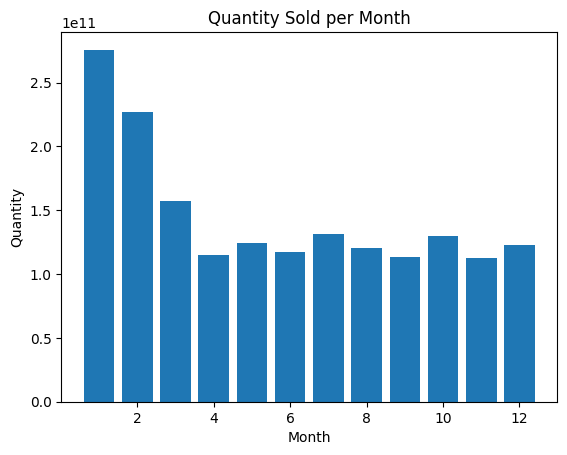

In [34]:
import matplotlib.pyplot as plt

grouped_data = merged.groupby('month').apply(lambda x: x['quantity'].sum() * x['price'].sum())

plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Sold per Month')
plt.show()


# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [39]:
merged['age_range'] = pd.cut(merged['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

In [40]:
pivot_table = merged.pivot_table(index='category', columns='age_range', values='sales', aggfunc='sum')
pivot_table

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95
Clothing,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04
Cosmetics,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80
Food & Beverage,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12
Shoes,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97
Souvenir,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25
Technology,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00
Toys,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00
